In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
import re 
import nltk 
from collections import Counter 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVC 
from sklearn import metrics

In [2]:
books = pd.read_csv('BooksDataSet.csv')
books.drop('Unnamed: 0', axis=1, inplace=True)
books.head()

,book_id,book_name,genre,summary
0,3248537,Drowned Wednesday,Fantasy,Drowned Wednesday is the first Trustee among ...
1,27796919,The Lost Hero,Fantasy,"As the book opens, Jason awakens on a school ..."
2,3910776,The Eyes of the Overworld,Fantasy,Cugel is easily persuaded by the merchant Fia...
3,5969644,Magic's Promise,Fantasy,The book opens with Herald-Mage Vanyel return...
4,3173445,Taran Wanderer,Fantasy,Taran and Gurgi have returned to Caer Dallben...


In [29]:
books['summary']


0        Drowned Wednesday is the first Trustee among ...
1        As the book opens, Jason awakens on a school ...
2        Cugel is easily persuaded by the merchant Fia...
3        The book opens with Herald-Mage Vanyel return...
4        Taran and Gurgi have returned to Caer Dallben...
                              ...                        
2995     A Novel from the NUMA files, A Kurt Austin Ad...
2996     Gilbert Kemp is dealer specializing in antiqu...
2997     "How do you know when you're in too deep? Dav...
2998     The story concerns the life of Johnnie Pascoe...
2999     The First Chief: Will Henry Lee: The novel op...
Name: summary, Length: 3000, dtype: object

In [3]:
## cleaning the text 
def cleantext(text):
    
    # removing the "\"
    text = re.sub("'\''","",text)
    
    # removing special symbols 
    text = re.sub("[^a-zA-Z]"," ",text)
    
    # removing the whitespaces
    text = ' '.join(text.split())
    
    # convert text to lowercase 
    text = text.lower()
    
    return text 

books['summary'] = books['summary'].apply(lambda x:cleantext(x))
books['summary'].iloc[1]

'as the book opens jason awakens on a school bus unable to remember who or where he is or anything about his past he is sitting next to piper mclean and leo valdez who call him by name and say they are his girlfriend and best friend respectively all three are part of a class field trip to the grand canyon and after they arrive a classmate dylan turns into a venti storm spirit and attacks the trio and their trip leader coach gleeson hedge in the ensuing fight jason surprises everyone including himself when one of his coins turns into a sword which he uses to battle the storm spirits coach hedge who reveals himself to be a satyr during the fight is taken captive by a fleeing spirit after the battle a flying chariot arrives to rescue the trio but one of the people in it annabeth is upset when she discovers that her missing boyfriend percy jackson is not there as she expected annabeth seeking percy was told in a vision from the goddess hera to look there for the guy with one shoe but this 

In [4]:
# Count the number of words in the summary.
text = books['summary'].iloc[1]
word_list = text.split()
word_count = len(word_list)
print("Number of words in the text:", word_count)

Number of words in the text: 575


##### The most Frequent Words 

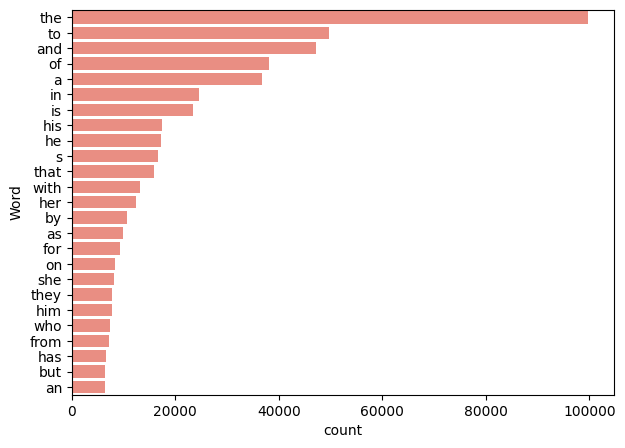

In [5]:
def most_frequent_words(text,no_of_words):
    
    allwords = ' '.join([char for char in text])
    allwords = allwords.split()
    fdist = nltk.FreqDist(allwords)
    
    wordsdf = pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    df = wordsdf.nlargest(columns="count",n = no_of_words)
    
    plt.figure(figsize=(7,5))
    ax = sn.barplot(data=df,x='count',y='word', color='salmon')
    ax.set(ylabel = 'Word')
    plt.show()
    
    return wordsdf

# top 25 frequent words 

wordsdf = most_frequent_words(books['summary'],25)

In [6]:
# which word repeated most 
wordsdf.sort_values('count',ascending=False).head(10).style.background_gradient(cmap='plasma')

,word,count
3,the,99808
17,to,49665
14,and,47183
46,of,38003
23,a,36749
80,in,24496
2,is,23358
49,his,17464
51,he,17210
12,s,16710


### Removing the stop_words 

In [7]:
# removing the stop_words 
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_top_words(text):
    
    remove_top_word = [word for word in text.split() if word not in stop_words] 
    return ' '.join(remove_top_word)

books['summary']=books['summary'].apply(lambda x:remove_top_words(x))
books['summary'].iloc[1]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ratho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'book opens jason awakens school bus unable remember anything past sitting next piper mclean leo valdez call name say girlfriend best friend respectively three part class field trip grand canyon arrive classmate dylan turns venti storm spirit attacks trio trip leader coach gleeson hedge ensuing fight jason surprises everyone including one coins turns sword uses battle storm spirits coach hedge reveals satyr fight taken captive fleeing spirit battle flying chariot arrives rescue trio one people annabeth upset discovers missing boyfriend percy jackson expected annabeth seeking percy told vision goddess hera look guy one shoe turns jason shoe destroyed fight jason piper leo told demigods taken back camp half blood meet greek demigod children like leo revealed son hephaestus piper daughter aphrodite jason son zeus though hera tells champion jason later discovers full brother zeus demigod daughter thalia grace hunter artemis shortly arrive three given quest rescue hera captured set soon dis

In [8]:
# Count the number of words in the summary.
text = books['summary'].iloc[1]
word_list = text.split()
word_count = len(word_list)
print("Number of words in the text:", word_count)

Number of words in the text: 293


### Lemmatizing 

In [9]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemma=WordNetLemmatizer()
 
def lematizing(sentence):
    stemSentence=""
    for word in sentence.split():
        stem = lemma.lemmatize(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence 

books['summary']= books['summary'].apply(lambda x : lematizing(x))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ratho\AppData\Roaming\nltk_data...


### Stemming 

In [10]:
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer()

def stemming(sentence):
    
    stemmed_sentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemmed_sentence+=stem
        stemmed_sentence+=" "
    stemmed_sentence = stemmed_sentence.strip()
    return stemmed_sentence 



books['summary'] = books['summary'].apply(lambda text:stemming(text))
books['summary'].iloc[1]

'book open jason awaken school bu unabl rememb anyth past sit next piper mclean leo valdez call name say girlfriend best friend respect three part class field trip grand canyon arriv classmat dylan turn venti storm spirit attack trio trip leader coach gleeson hedg ensu fight jason surpris everyon includ one coin turn sword us battl storm spirit coach hedg reveal satyr fight taken captiv flee spirit battl fli chariot arriv rescu trio one peopl annabeth upset discov miss boyfriend perci jackson expect annabeth seek perci told vision goddess hera look guy one shoe turn jason shoe destroy fight jason piper leo told demigod taken back camp half blood meet greek demigod child like leo reveal son hephaestu piper daughter aphrodit jason son zeu though hera tell champion jason later discov full brother zeu demigod daughter thalia grace hunter artemi shortli arriv three given quest rescu hera captur set soon discov enemi work order gaea overthrow god quest encount thalia hunter look perci thalia

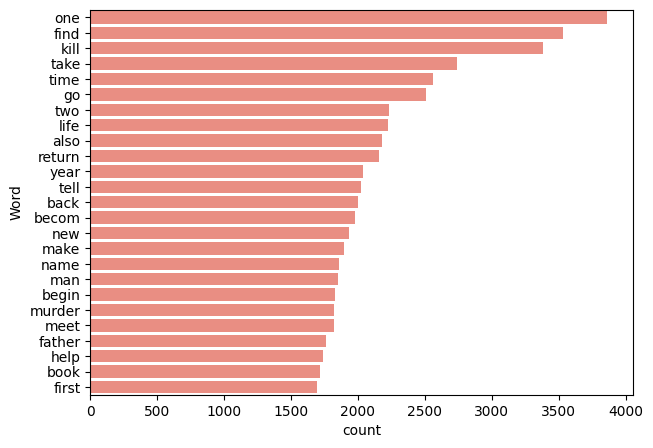

In [12]:
freq_df = most_frequent_words(books['summary'],25)

In [13]:
freq_df.sort_values('count',ascending=False).head(10).style.background_gradient(cmap='plasma')

,word,count
242,one,3858
230,find,3533
240,kill,3380
153,take,2743
1143,time,2563
88,go,2509
38,two,2235
418,life,2224
415,also,2179
407,return,2158


### Enconding

In [14]:
list(books['genre'].unique())

['Fantasy',
 'Science Fiction',
 'Crime Fiction',
 'Historical novel',
 'Horror',
 'Thriller']

In [15]:
books_list = list(books['genre'].unique())
encode = [i for i in range(len(books_list))]
mapper = dict(zip(books_list,encode))
print(mapper)

{'Fantasy': 0, 'Science Fiction': 1, 'Crime Fiction': 2, 'Historical novel': 3, 'Horror': 4, 'Thriller': 5}


In [16]:
books['genre'] = books['genre'].map(mapper)
books['genre'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

### Model Building 

In [ ]:
count_vec = CountVectorizer(max_df=0.90,min_df=2,
                            max_features=1000,stop_words='english')

bagofword_vec = count_vec.fit_transform(books['summary'])
bagofword_vec

In [ ]:
test = books['genre']
X_train,X_test,y_train,y_test = train_test_split(bagofword_vec,test,test_size=0.2)

X_train.shape,X_test.shape

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
svccpred = svc.predict(X_test)
print(metrics.accuracy_score(y_test,svccpred))

In [ ]:
mb = MultinomialNB()
mb.fit(X_train,y_train)
mbpred = mb.predict(X_test)
print(metrics.accuracy_score(y_test,mbpred))

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,rf.predict(X_test)))

### Model building part 2
- changing from countvectorize to TFDIF vectorizer 

In [ ]:
# Labeling each 'genre' with an unique number 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(books['genre'])

X_train,X_test,y_train,y_test = train_test_split(books['summary'],
                                                 y,test_size=0.2,
                                                 random_state=557)

X_train.shape,X_test.shape

In [ ]:
# performing tf-idf 

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=10000)
xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))
xtest_tfidf = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [ ]:
 svc = SVC()
 svc.fit(xtrain_tfidf,y_train)
 svccpred = svc.predict(xtest_tfidf)
 print(metrics.accuracy_score(y_test,svccpred))

In [ ]:
md = MultinomialNB()
mb.fit(xtrain_tfidf,y_train)
mbpred = md.predict(xtest_tfidf)
print(metrics.accuracy_score(y_test,mbpred))

### Model testing 


In [ ]:
def test(text,model):
    
    text = cleantext(text)
    text = removestopwords(text)
    text = lematizing(text)
    text = stemming(text)
    
    text_vector = tfidf_vectorizer.transform([text])
    predicted = model.predict(text_vector)
    return predicted

ans = books['summary'].apply(lambda text:test(text,mb))

# printing the 
# print(list(mapper.keys())[list(mapper.values()).index(ans)])

ans

In [ ]:
predicted_genres = []
for i in range(len(ans)):
    
    index_val = ans[i][0]
    predicted_genres.append(list(mapper.keys())[list(mapper.values()).index(index_val)])

In [ ]:
# show genre and it encoding  
mapper

In [ ]:
# mapping the training genre as well 
newmap = dict([(value,key) for key,value in mapper.items()])
newmap 

In [ ]:
books['Actual Genre'] = books['genre'].map(newmap)
books['Predicted_genre'] = np.array(predicted_genres)
books.head()

In [ ]:
books = books[['book_name','summary','Actual Genre','Predicted_genre']]
books

In [ ]:
dict(Counter(books['Actual Genre'].values))

In [ ]:
dict(Counter(books['Predicted genre'].values))

In [ ]:
sn.countplot(x=books['Predicted_genre'])
plt.xticks(rotation = '45')

In [ ]:
sn.countplot(x = books['Actual Genre'])
plt.xticks(rotation = '45')


In [ ]:
# Saving the model 

import pickle 
file = open('bookgenremodel.pkl','wb')
pickle.dump(mb,file)
file.close()

In [ ]:
tfidf_vectorizer

In [ ]:
file = open('tfdifvector.pkl','wb')
pickle.dump(tfidf_vectorizer,file)
file.close()

In [ ]:
wordnet_down = nltk.download('wordnet',download_dir='./')
wordnet_down

In [ ]:
nltk.download('stopwords',download_dir='./')